In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
sns.color_palette(["#4a4a4a", "#00798c", "#d1495b", '#edae49', '#66a182', '#ffe2b3', '#ccffe4'])

[(0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (1.0, 0.8862745098039215, 0.7019607843137254),
 (0.8, 1.0, 0.8941176470588236)]

In [3]:
projects_message=pd.read_csv('../Label/fenzu.csv',index_col=0).T
projects_message=projects_message.to_dict('list')

In [15]:
scores = pd.read_csv('../Results/Results2/2.PSMdata.csv', index_col=0)
scores['Trail'] = [projects_message[i][3] for i in scores['Project']]
scores.head(2)

,Project,Control,Case,Control_matched,Case_matched,Delta_Unmatched,Delta_Matched,Trail
0,08,0.938393,0.988357,0.983176,0.983748,0.049964,0.000572,premature_born
1,09,0.373933,0.626067,0.627506,0.631632,0.252133,0.004126,schizofrenia


In [16]:
result = scores.groupby('Trail').mean().sort_values('Delta_Unmatched', ascending=False)
result.head(2)

,Control,Case,Control_matched,Case_matched,Delta_Unmatched,Delta_Matched
Trail,,,,,,
acute_diarrhoea,0.464390,0.823071,0.659378,0.660837,0.358681,0.002225
metabolic_syndrome,0.308072,0.564148,0.351985,0.349172,0.256077,0.002813


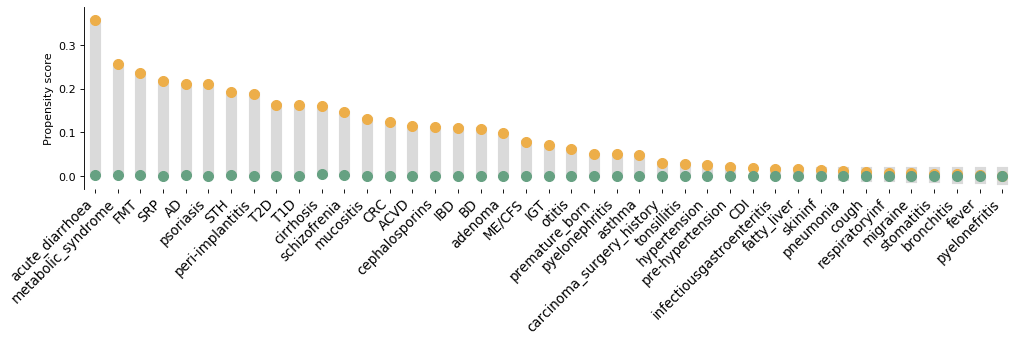

In [64]:
_ = plt.figure(0, (15, 3), dpi=80)
gs = gridspec.GridSpec(1, 1, hspace=0.1)
ax = plt.subplot(gs[0, 0])
for i in range(result.shape[0]):
    index = result.index[i]
    if result.loc[index, 'Delta_Matched']<result.loc[index, 'Delta_Unmatched']:
        span = 0.008
    else:
        span = -0.008
    _ = plt.plot([i, i], [result.loc[index, 'Delta_Matched']+span, 
                          result.loc[index, 'Delta_Unmatched']-span], 
                 c='#4a4a4a', alpha=0.2, zorder=-9, lw=10)
    
_ = plt.scatter(range(result.shape[0]), result['Delta_Unmatched'], c='#edae49', s=80)
_ = plt.scatter(range(result.shape[0]), result['Delta_Matched'], c='#66a182', s=80)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

_ = plt.xlim(-0.5, result.shape[0]-0.5)
_ = plt.xticks(range(result.shape[0]), result.index, rotation=45, ha='right', fontsize=12)
_ = plt.ylabel('Propensity score')
_ = plt.savefig('../20230718_Results/Figure 4A. Disease difference.pdf', dpi=300)